## Занятие 6
## Математический анализ
## Дифференцирование

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import diff, solve, nsolve, solveset, latex, S, simplify, fraction
from sympy import sin as Sin
from sympy.calculus.util import continuous_domain
%matplotlib inline

## Лабораторная работа 6
## Математический анализ
## Задание 1
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду. 
$$
y = x^2e^{-x}
$$

Область определения функции:


Reals

Производная первого порядка:


-x**2*exp(-x) + 2*x*exp(-x)

Нули производной:


[0, 2]

Значения производной около нулей:


[-3*E, exp(-1), -3*exp(-3)]

Точки экстремума функции:


[0, 2]

Производная второго порядка:


(x**2 - 4*x + 2)*exp(-x)

Нули производной второго порядка:


[2 - sqrt(2), sqrt(2) + 2]

Значения производной второго порядка около нулей:


[(-2 + (1 - sqrt(2))**2 + 4*sqrt(2))*exp(-1 + sqrt(2)),
 -2*exp(-2),
 (-10 - 4*sqrt(2) + (sqrt(2) + 3)**2)*exp(-3 - sqrt(2))]

Точки перегиба:


[2 - sqrt(2), sqrt(2) + 2]

Вертикальные асимптоты отсутствуют

lim f(x) при x -> -oo:


oo

lim f(x) при x -> +oo:


0

Горизонтальная асимптота:
y = 0

k при x -> -oo:


-oo

k при x -> +oo:


0

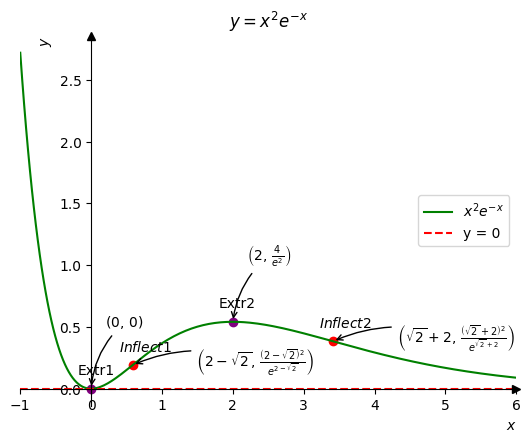

In [98]:
from sympy.abc import x


X_MIN: float
X_MAX: float


def config_ax(ax):
    global X_MIN, X_MAX
    ax.set_title("$y = x^2  e^{-x}$")
    ax.legend(loc="right")
    ax.set_xlim(X_MIN, X_MAX)
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_position(("data", 0))
    ax.spines["left"].set_position(("data", 0))
    ax.set_ylabel("$y$", loc="top")
    ax.set_xlabel("$x$", loc="right")
    ax.plot(1, 0, "k>", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
    

def f(x):
    return x*x*sympy.E**(-x)


def main():
    domain_f = continuous_domain(f(x), x, domain=S.Reals)
    print("Область определения функции:")
    display(domain_f)

    df_x = f(x).diff(x)
    print("Производная первого порядка:")
    display(df_x)
    df_roots = sorted(solve(df_x, x))
    print("Нули производной:")
    display(df_roots)

    points = [df_roots[0] - 1] + \
            [(df_roots[i] + df_roots[i + 1]) / 2 for i in range(len(df_roots) - 1)] + \
            [df_roots[-1] + 1]
    df_points = [df_x.subs(x, point) for point in points]
    print("Значения производной около нулей:")
    display(df_points)

    extreme_points = [root for i, root in enumerate(df_roots) if df_points[i] * df_points[i+1] < 0]
    print("Точки экстремума функции:")
    display(extreme_points)
    
    df2_x = f(x).diff(x, 2)
    print("Производная второго порядка:")
    display(df2_x)
    df2_roots = sorted(solve(df2_x, x))
    print("Нули производной второго порядка:")
    display(df2_roots)

    points_2 = [df2_roots[0] - 1] + \
            [(df2_roots[i] + df2_roots[i + 1]) / 2 for i in range(len(df2_roots) - 1)] + \
            [df2_roots[-1] + 1]
    df2_points = [df2_x.subs(x, point) for point in points_2]
    print("Значения производной второго порядка около нулей:")
    display(df2_points)

    inflection_poins = [root for i, root in enumerate(df2_roots) if df2_points[i] * df2_points[i+1] < 0]
    print("Точки перегиба:")
    display(inflection_poins)
    

    numerator, denominator = sympy.fraction(f(x))
    vert_asymptotes = solve(denominator)
    if vert_asymptotes:
        print("Вериткальные асимптоты:")
        display(*vert_asymptotes)
    else:
        print("Вертикальные асимптоты отсутствуют\n")
    
    lim_neg = f(x).limit(x, -sympy.oo)
    print("lim f(x) при x -> -oo:")
    display(lim_neg)
    lim_pos = f(x).limit(x, +sympy.oo)
    print("lim f(x) при x -> +oo:")
    display(lim_pos)
    print("Горизонтальная асимптота:")
    print(f"y = {lim_pos}\n")
    
    k_neg = sympy.limit(f(x)/x, x, -sympy.oo)
    print("k при x -> -oo:")
    display(k_neg)
    k_pos = sympy.limit(f(x)/x, x, +sympy.oo)
    print("k при x -> +oo:")
    display(k_pos)

    global X_MIN, X_MAX
    X_MIN = float(points[0])
    X_MAX = float(points[-1]) + 3.0
    x_space = np.linspace(X_MIN, X_MAX, 256)
    plt.plot(
        x_space, 
        f(x_space),
        color='g',
        label="$x^2  e^{-x}$"
    )
    plt.axhline(
        y=lim_pos, 
        color='r', 
        linestyle="--",
        label=f"y = {lim_pos}"
    )

    extreme_y = [f(p) for p in extreme_points]
    plt.scatter(extreme_points, extreme_y, color="purple")
    for i, x0 in enumerate(extreme_points):
        f0 = extreme_y[i]
        plt.annotate(
            fr"$\left({latex(x0)},\,{latex(f0)}\right)$",
            xy=(x0, f0),
            xycoords="data",
            xytext=(x0 + 0.2, f0 + 0.5),
            textcoords="data",
            arrowprops={
                "arrowstyle": "->",
                "connectionstyle": "arc3,rad=.2",
            }
        )
        plt.annotate(
            f"$Extr{i + 1}$",
            xy=(x0, f0),
            xycoords="data",
            xytext=(-10, 10),
            textcoords="offset points",
            fontsize=10,
        )
    
    inflection_y = [f(p) for p in inflection_poins]
    plt.scatter(inflection_poins, inflection_y, color='r')
    for i, x0 in enumerate(inflection_poins):
        f0 = inflection_y[i]
        plt.annotate(
                fr"$\left({latex(x0)},\,{latex(f0)}\right)$", 
                xy=(x0, f0), 
                xycoords="data",
                xytext=(x0 + 0.9, f0), 
                textcoords="data", 
                fontsize=10,
                arrowprops={
                    "arrowstyle": "->", 
                    "connectionstyle": "arc3,rad=.2",
                })
        plt.annotate(
            f"$Inflect{i+1}$", 
            xy=(x0, f0), 
            xycoords="data",
            xytext=(-10, 10), 
            textcoords="offset points", 
            fontsize=10
        )

    config_ax(plt.gca())


if __name__ == "__main__":
    main()

## Задание 2
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду. 
$$
y=xe^{2/x} + 1 
$$

## Индивидуальное задание
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот (если есть), отметить и подписать точки экстремума и точки перегиба (если есть),
включить функцию и асимптоты (если есть) в легенду. 